In [6]:
import os
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

if os.name =='nt':
    font_family="Malgun Gothic"
else:
    font_family="AppleGothic"
sns.set(font=font_family,rc={"axes.unicode_minus":False})

In [7]:
mu = 0.7
bern = stats.bernoulli(mu)

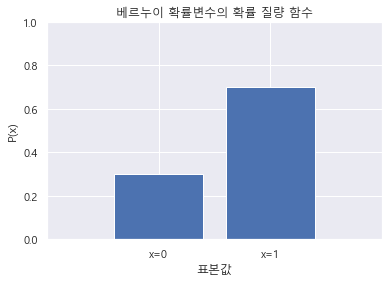

In [8]:
b_x=[0,1]
bern_pmf = bern.pmf(b_x)

plt.bar(b_x,bern_pmf)
plt.xlim(-1,2)
plt.ylim(0,1)
plt.xticks([0,1],["x=0","x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률 질량 함수")
plt.show()

In [9]:
x_sample_bern = bern.rvs(100,random_state=0)

In [10]:
x_sample_bern

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [11]:
y_bern = np.bincount(x_sample_bern,minlength=2)/float(len(x_sample_bern))

df_bern = pd.DataFrame({"결과": bern_pmf,"검증(시뮬레이션)":y_bern})
df_bern.index=[0,1]
df_bern

,결과,검증(시뮬레이션)
0,0.3,0.23
1,0.7,0.77


In [14]:
print("k=3,n=15,p=0.3의 PMF:",stats.binom.pmf(3,n=15,p=0.3))
print("k=0~4,n=15,p=0.3의 PMF:",stats.binom.pmf(4,n=15,p=0.3))

k=3,n=15,p=0.3의 PMF: 0.17004021326428484
k=0~4,n=15,p=0.3의 PMF: 0.21862313133979488


In [16]:
def bion_dist(k,n,p):
    pmf_bion = stats.binom.pmf(k,n=n,p=p)
    return pmf_bion

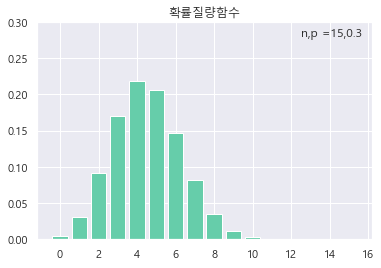

In [17]:
x=np.arange(0,16)
pdf_result=[bion_dist(k,15,0.3) for k in range(0,16)]

plt.title("확률질량함수")
plt.ylim(0,0.3)
plt.text(12.5,0.28,'n,p =15,0.3')
plt.bar(x,pdf_result,color='mediumaquamarine')
plt.show()

In [18]:
stats.poisson.pmf(3,2,loc=0)

0.18044704431548356

In [19]:
def pois_dist(n,lamb):
    pmf_poi = stats.poisson.pmf(n,lamb,loc=0)
    return pmf_poi

In [20]:
x = np.arange(0,41)
poi_pdf_result = [pois_dist(n,10) for n in range(0,41)]

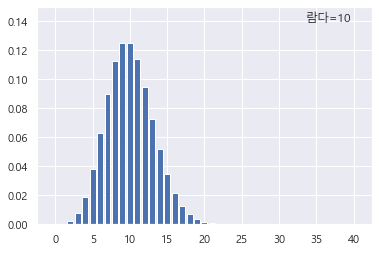

In [21]:
plt.ylim(0,0.15)
plt.text(33.5,0.14,'람다=10')
plt.bar(x,poi_pdf_result)
plt.show()

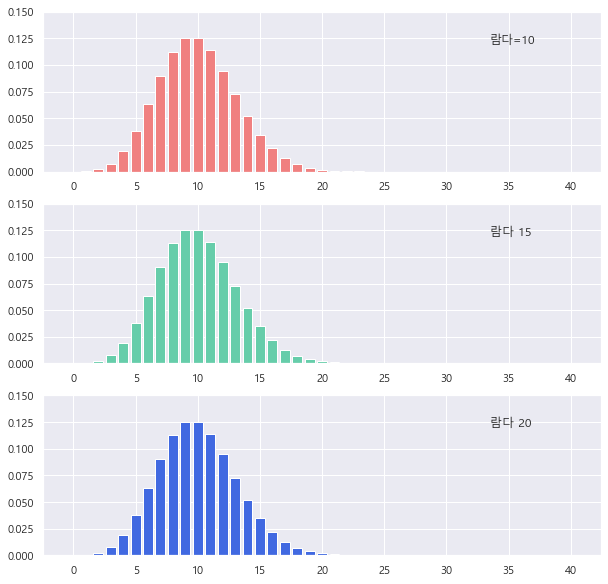

In [22]:
x=np.arange(0,41)
fig = plt.figure(figsize = (10,10))
fig.add_subplot(3,1,1)
pmf_poin1 = np.array([pois_dist(n,10) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.12,'람다=10')
plt.bar(x,pmf_poin1,color='lightcoral')

fig.add_subplot(3,1,2)
pmf_poin2 =np.array([pois_dist(n,15) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5,0.12,'람다 15')
plt.bar(x,pmf_poin1,color='mediumaquamarine')

fig.add_subplot(3,1,3)
pmf_poin3 =np.array([pois_dist(n,20) for n in range(0,41)])
plt.ylim(0, 0.15)
plt.text(33.5,0.12,'람다 20')
plt.bar(x,pmf_poin1,color='royalblue')

plt.show()